In [ ]:
!pip install rpy2==3.5.1 --quiet
%load_ext rpy2.ipython

In [ ]:
%%R

mtcars
lm(mpg ~ wt, mtcars)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  



In [ ]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})
df

,cups_of_coffee,productivity
0,0,2
1,1,5
2,2,6
3,3,8
4,4,9
5,5,8
6,6,0
7,7,1
8,8,0
9,9,-1


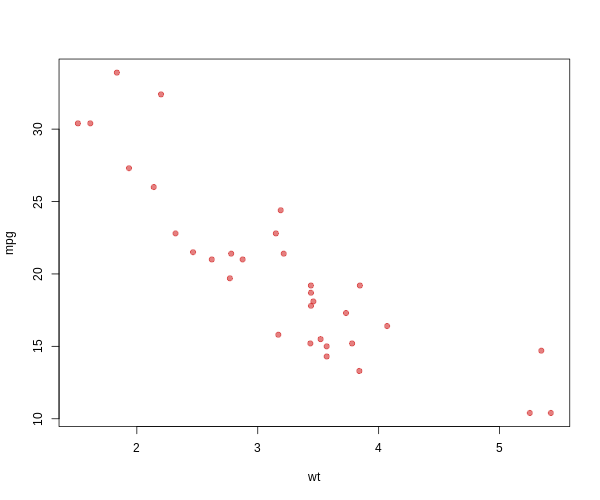

In [ ]:
%%R -w 600 -h 500
plot(mpg ~ wt, data=mtcars, pch=19, col=rgb(.8,0,0,0.5))

In [ ]:
%%R
mtcars$cyl <- as.factor(mtcars$cyl)
D <- mtcars
D <- D[order(D$cyl, decreasing = FALSE),]
str(D)
model.matrix(lm(mpg ~ wt * cyl, D)) # This is the model matrix for ANCOVA
lm(mpg ~ wt * cyl, D)

fit <- aov(mpg ~ wt * cyl, data=D)
model.matrix(fit)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  22.8 24.4 22.8 32.4 30.4 33.9 21.5 27.3 26 30.4 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 1 1 1 1 1 1 1 1 1 1 ...
 $ disp: num  108 146.7 140.8 78.7 75.7 ...
 $ hp  : num  93 62 95 66 52 65 97 66 91 113 ...
 $ drat: num  3.85 3.69 3.92 4.08 4.93 4.22 3.7 4.08 4.43 3.77 ...
 $ wt  : num  2.32 3.19 3.15 2.2 1.61 ...
 $ qsec: num  18.6 20 22.9 19.5 18.5 ...
 $ vs  : num  1 1 1 1 1 1 1 1 0 1 ...
 $ am  : num  1 0 0 1 1 1 0 1 1 1 ...
 $ gear: num  4 4 4 4 4 4 3 4 5 5 ...
 $ carb: num  1 2 2 1 2 1 1 1 2 2 ...
                    (Intercept)    wt cyl6 cyl8 wt:cyl6 wt:cyl8
Datsun 710                    1 2.320    0    0   0.000   0.000
Merc 240D                     1 3.190    0    0   0.000   0.000
Merc 230                      1 3.150    0    0   0.000   0.000
Fiat 128                      1 2.200    0    0   0.000   0.000
Honda Civic                   1 1.615    0    0   0.000   0.000
Toyota Corolla                1 1.835    0    0   

In [ ]:
%%R
# DATA PRE-PROCESSING:
dat = read.csv(url("https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/perceptron"), header=F)
head(dat)

        V1       V2 V3
1 34.62366 78.02469  0
2 30.28671 43.89500  0
3 35.84741 72.90220  0
4 60.18260 86.30855  1
5 79.03274 75.34438  1
6 45.08328 56.31637  0


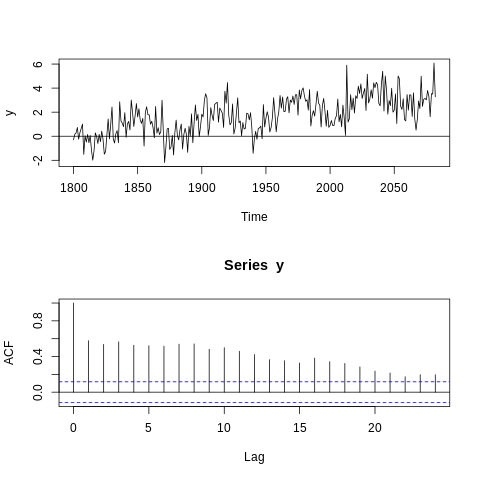

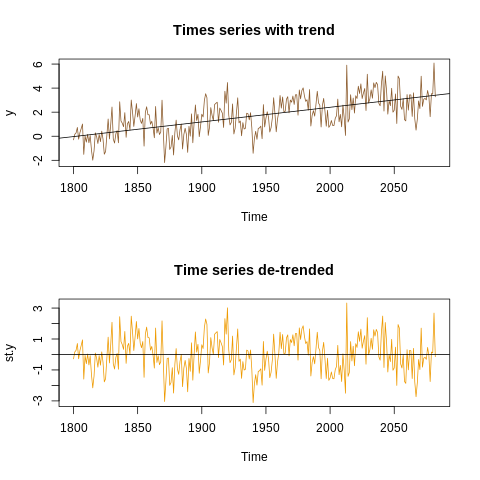

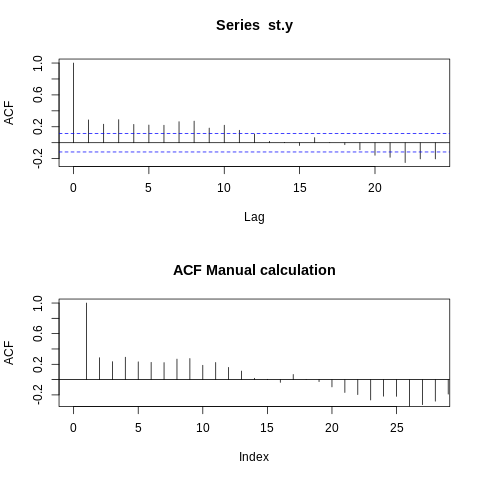

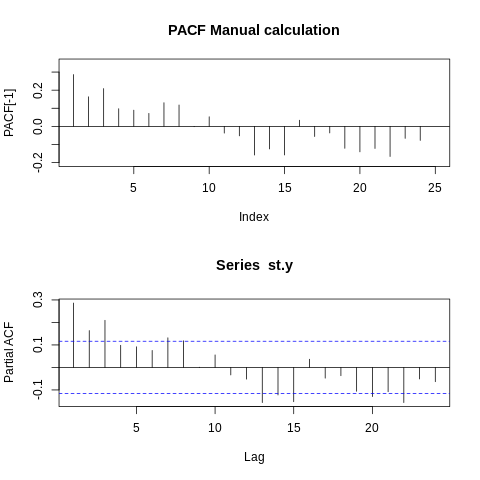

In [ ]:
%%R

x=seq(pi, 10 * pi, 0.1)
y = 0.1 * x + sin(x) + rnorm(x)
y = ts(y, start=1800)
par(mfrow=c(2,1))
plot(y)
abline(h=0)
acf(y)

#Detrending:

model=lm(y ~ I(1801:2083))
summary(model)

st.y = y - predict(model)

plot(y, main="Times series with trend", col='tan4')
abline(model)
plot(st.y, main = "Time series de-trended", col='orange2')
abline(h=0)
acf(st.y)


ACF = 0
ACF[1] = cor(st.y, st.y)
for(i in 1:30){
  lag = st.y[-c(1:i)]
  clipped.y = st.y[1:length(lag)]
  ACF[i + 1] = cor(clipped.y, lag)
}

plot(ACF, ylim = c(-.3, 1), xlim = c(-.01,28),type="h", main = "ACF Manual calculation")
abline(h = 0)


#PACF:
PACF = 0
for(j in 2:25){
  cols = j
  rows = length(st.y) - j + 1

  lag = matrix(0, rows, j)

for(i in 1:cols){
  lag[ ,i] = st.y[i : (i + rows - 1)]
}
  lag = as.data.frame(lag)
  fit = lm(lag$V1 ~ . - 1, data = lag)
  PACF[j] = coef(fit)[j - 1]
}

PACF
head(pacf(st.y, plot = F))

plot(PACF[-1], xlim = c(1,25), ylim = c(-.2,.35), type="h", main = "PACF Manual calculation")
abline(h = 0)
pacf(st.y)

In [ ]:
%%R
capture.output(install.packages('RCurl'), install.packages('zoo'))
capture.output(require(repr),require(RCurl),require(foreign),require(tidyverse),require(zoo),require(RColorBrewer))

(as ‘lib’ is unspecified)







	‘/tmp/RtmpRdlvtL/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpRdlvtL/downloaded_packages’






✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()


Attaching package: ‘zoo’



    as.Date, as.Date.numeric





character(0)


In [ ]:
%%R
# Extracting the number of confirmed cummulative cases by country from the Johns Hopkins website:

x = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
# corona <- read.csv(textConnection(x))

corona = (read_csv(x)
          %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                           names_to = "date",
                           values_to = "cases")
          %>% select(`Province/State`,`Country/Region`, date, cases)
          %>% mutate(date=as.Date(date,format="%m/%d/%y"))
          %>% drop_na(cases)
          %>% rename(country="Country/Region", provinces="Province/State")
)

cc <- (corona
       %>% filter(country %in% c("Italy", "Spain","US", "Norway", "Denmark", "Sweden","Korea, South", "Brazil","India", "United Kingdom", "Mexico"))
)

ccw <- (cc
        %>% pivot_wider(names_from="country",values_from="cases")
        %>% filter(Italy>5)
)

# Extracting the number of confirmed cummulative cases in China from the Johns Hopkins website:

china <- corona[corona$country=='China',]
provinces <- c('Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
               'Jiangxi','Shandong','Jiangsu','Sichuan','Heilongjiang','Hebei',
               'Fujian','Guangxi','Shaanxi','Yunnan','Hainan','Guizhou','Shanxi',
               'Gansu','Hong Kong','Liaoning','Jilin','Xinjiang','Inner Mongolia',
               'Ningxia','Qinghai','Macau','Tibet')

china_prov <- china[is.element(china$provinces,provinces),]
ccchina <- china_prov[,2:4]
temp <- aggregate(ccchina[ ,3], FUN="sum", by=list(as.Date(ccchina$date)))
ccchina[1:nrow(temp),2:3] <- temp
ccchina <- ccchina[1:nrow(temp),]

ccw_china <- (ccchina
              %>% pivot_wider(names_from=country,values_from="cases")
              %>% filter(China>1)
)

# Extracting number of cummulative deaths by country from the Johns Hopkins website:

y = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
corona_death <- read.csv(textConnection(y))

corona_death = (read_csv(y)
                %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                                 names_to = "date",
                                 values_to = "cases")
                %>% select(`Province/State`, `Country/Region`, date, cases)
                %>% mutate(date=as.Date(date,format="%m/%d/%y"))
                %>% drop_na(cases)
                %>% rename(country="Country/Region")
                %>% rename(state="Province/State")
)

ccd <- (corona_death
        %>% filter(country %in% c("Italy", "Spain","US", "Norway", "Denmark", "Sweden", "Brazil", "India", "Korea, South", "United Kingdom", "Mexico"))
)

ccwd <- (ccd
         %>% pivot_wider(names_from="country",values_from="cases")
         %>% filter(Italy>1)
)

# Extracting the number of cummulative deaths in China from the Johns Hopkins website:

china <- corona_death[corona_death$country=='China',]
provinces <- c('Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
               'Jiangxi','Shandong','Jiangsu','Sichuan','Heilongjiang','Hebei',
               'Fujian','Guangxi','Shaanxi','Yunnan','Hainan','Guizhou','Shanxi',
               'Gansu','Hong Kong','Liaoning','Jilin','Xinjiang','Inner Mongolia',
               'Ningxia','Qinghai','Macau','Tibet')
china_prov <- china[is.element(china$state,provinces),]
ccchina <- china_prov[,2:4]
temp <- aggregate(ccchina[ ,3], FUN="sum", by=list(as.Date(ccchina$date)))

ccchina[1:nrow(temp),2:3] <- temp
ccchina <- ccchina[1:nrow(temp),]



Rows: 289 Columns: 1054
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (2): Province/State, Country/Region
dbl (1052): Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 289 Columns: 1054
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (2): Province/State, Country/Region
dbl (1052): Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


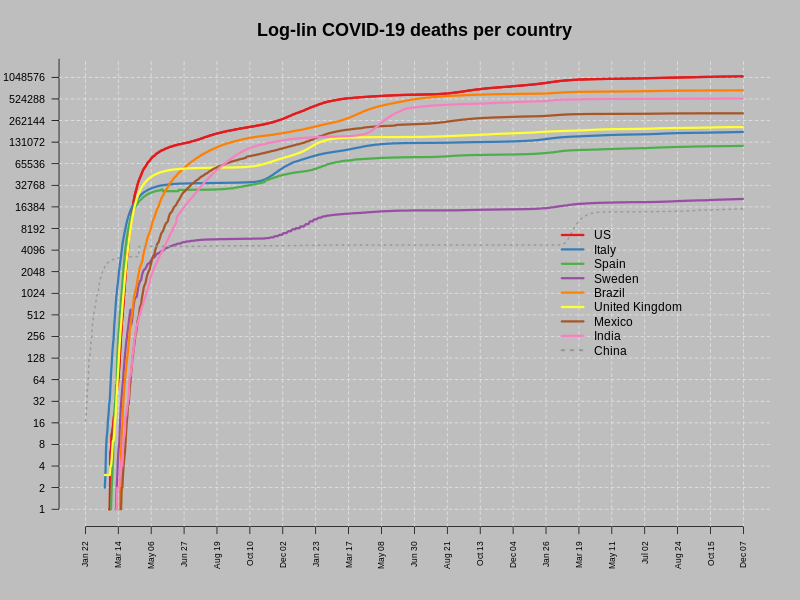

In [ ]:
%%R -w 800 -h 600

# Log-linear plot of cummulative deaths by country with the number of cases in Italy for comparison:
options(warn = -1)
options(repr.plot.width=50, repr.plot.height=8)
par(bg = 'gray')

co <- brewer.pal(n = 9, name = 'Set1')
plot(ccwd$date, ccwd$US, type="l",
     lwd=3,
     ylab='',
     xlab='',
     log='y',
     xlim=c(min(ccchina$date), max(ccwd$date)+1),
     main ='Log-lin COVID-19 deaths per country',
     col=co[1],
     axes=FALSE,
     cex.main=1.5)


at1 <- seq(min(ccchina$date), max(ccwd$date)+1, by=0.05*length(ccchina$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- 2^seq(0,30, by=1)
axis(side=2, at2, cex.axis=0.9, las=1)


abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines

lines(ccwd$date, ccwd$US,               lwd=3, col=co[1])
lines(ccwd$date, ccwd$Italy,            lwd=3, col=co[2])
lines(ccwd$date, ccwd$Spain,            lwd=3, col=co[3])
lines(ccwd$date, ccwd$Sweden,           lwd=3, col=co[4])
lines(ccwd$date, ccwd$Brazil,           lwd=3, col=co[5])
lines(ccwd$date, ccwd$`United Kingdom`, lwd=3, col=co[6])
lines(ccwd$date, ccwd$Mexico, type="l", lwd=3, col=co[7])
lines(ccwd$date, ccwd$India, type='l',  lwd=3, col=co[8])
lines(ccchina$date, ccchina$cases, type="l", lty=3, lwd=2, col=co[9])

countries <- c("US", "Italy", "Spain", "Sweden", "Brazil", "United Kingdom", "Mexico", "India", "China")
legend(ccw$date[round(0.7*length(ccw$date))], .5*max(ccwd$Sweden), bg="transparent",
       legend = countries,
       col = co[1:9], lty=c(rep(1,8),3), lwd=3, cex=1,
       box.lty=0)
